<a href="https://colab.research.google.com/github/haimin777/tools/blob/master/TrainRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.3.0
!pip install -U git+https://github.com/haimin777/keras-ocr.git
!pip install -U opencv-python # We need the most recent version of OpenCV.

!pip install tensorflow-addons==0.11.2

%tensorflow_version 2.x

from IPython.display import clear_output
clear_output()

In [ ]:
import zipfile
import datetime
import string
import glob
import math
import os
import shutil as sh

import typing
import tqdm
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import tensorflow as tf
import sklearn.model_selection

from tensorflow import keras
import keras_ocr
import numpy as np
import pandas as pd
import imgaug

from xml.etree import ElementTree
from xml.etree.ElementTree import XMLParser
from numpy import array

import cv2

os.chdir('/content/drive/My Drive/AIgym/keras-ocr')
#!git clone https://github.com/debidatta/syndata-generation.git
#%tensorflow_version 1.x
!ls | grep zip

backgrounds.zip
croppedSuits.zip
datasetVin_fonts_27_1k_small_big.zip
datasetVin_fonts_27_262_small_big.zip
datasetVin_fonts_27_262_small.zip
datasetVin_fonts_27_5k_small_big_1.zip
datasetVin_fonts_27_5k_small_big_2.zip
datasetVin_fonts_300_262_small_1.zip
datasetVin_fonts_300_262_small_big.zip
datasetVin_fonts_300_5k_small_1.zip
datasetVin_fonts_300_5k_small_2.zip
fonts.zip
GG_groundTrue_Train.zip
GGPokerOk_GT_3_cat.zip
GG_TrainDataset_cards_2+1_1.zip
GG_TrainDataset_cards_2+1_2.zip
GroundTRue_3categories.zip
grpc_ocr_docker.zip
round_rectangles.zip


In [ ]:
!unzip -q -o datasetVin_fonts_300_5k_small_1.zip
!unzip -q -o datasetVin_fonts_300_5k_small_2.zip
!unzip -q -o datasetVin_fonts_27_5k_small_big_1.zip
!unzip -q -o datasetVin_fonts_27_5k_small_big_2.zip

In [ ]:
# Download data
if not os.path.exists('GG_TrainDataset_cards_2+1_1'):
     print('https://drive.google.com/file/d/1Om_I0ozRmoMJRLGilnZqbXNNR6uLH3h4/view?usp=sharing', 'download and unzip')


In [ ]:
jpg_paths = glob.glob('GG_TrainDataset_cards_2+1_1/*webp')
xml_paths = glob.glob('GG_TrainDataset_cards_2+1_1/*xml')

jpg_paths.sort()
xml_paths.sort()
dataset = keras_ocr.datasets.get_lableme_detector_dataset(jpg_paths, xml_paths)

len(dataset)

262

In [ ]:
def get_dataset(dirs_list):

    # create dataset from generated img + txt data
    

    dataset = []
    for directory in dirs_list:
        dataset += keras_ocr.datasets.get_DigitDataset_detector_dataset(directory, skip_illegible=True)

        print(len(dataset))           
    return dataset

In [ ]:

dirs_list = ['datasetVin_fonts_300_5k_small_1',
             'datasetVin_fonts_300_5k_small_2',
             'datasetVin_fonts_27_5k_small_big_1',
             'datasetVin_fonts_27_5k_small_big_1',
             
             ]

dataset += get_dataset(dirs_list)

len(dataset)


5000



10000



15000



20000


20262

In [ ]:
dataset = keras_ocr.datasets.get_DigitsData_recognizer_dataset(dataset)
len(dataset)

1102822

In [ ]:
# calculate dataset statistics
res_dict = {}
for item in tqdm_notebook(dataset):
    for char in item[2]:
        if char not in res_dict.keys():
            res_dict[char] = 1
        else:    
            res_dict[char] += 1
 
res_dict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


{'$': 66355,
 '%': 27,
 '(': 279,
 ')': 279,
 '+': 2,
 ',': 519,
 '-': 2,
 '.': 65727,
 '0': 27999,
 '1': 65501,
 '2': 35653,
 '3': 33963,
 '4': 33718,
 '5': 34187,
 '6': 33263,
 '7': 33535,
 '8': 33108,
 '9': 33460,
 ':': 27,
 '`': 262,
 'a': 53508,
 'b': 44872,
 'c': 44254,
 'd': 46398,
 'e': 46315,
 'f': 44689,
 'g': 44783,
 'h': 45148,
 'i': 46041,
 'j': 52434,
 'k': 52414,
 'l': 46049,
 'm': 45465,
 'n': 45568,
 'o': 46889,
 'p': 45540,
 'q': 52105,
 'r': 45891,
 's': 45351,
 't': 46611,
 'u': 44837,
 'v': 44703,
 'w': 44382,
 'x': 44258,
 'y': 45137,
 'z': 45119,
 '♠': 49144,
 '♣': 49172,
 '♥': 49295,
 '♦': 49477}

In [ ]:
#dataset = filt_list      
train, validation = sklearn.model_selection.train_test_split(
    dataset, train_size=0.8, random_state=42)

In [ ]:
import tensorflow.keras.optimizers as opts
adam_opt = opts.Adam(learning_rate=0.0001)

In [ ]:
!cp '/content/drive/My Drive/AIgym/keras-ocr/craft_mlt_25k.h5' '/root/.keras-ocr/craft_mlt_25k.h5'
!cp '/content/drive/My Drive/AIgym/keras-ocr/crnn_kurapan_notop.h5' '/root/.keras-ocr/crnn_kurapan_notop.h5'
!cp '/content/drive/My Drive/AIgym/keras-ocr/crnn_kurapan.h5' '/root/.keras-ocr/crnn_kurapan.h5'

In [ ]:
alphabet = string.digits + string.ascii_letters + '$%./ ♠♥♦♣' #$.% '
 
 
recognizer_alphabet = ''.join(sorted(set(alphabet.lower())))
 
recognizer = keras_ocr.recognition.Recognizer(alphabet=recognizer_alphabet)
recognizer.compile(optimizer=adam_opt)

Provided alphabet does not match pretrained alphabet. Using backbone weights only.
Looking for /root/.keras-ocr/crnn_kurapan_notop.h5


In [ ]:
rec_img_train = keras_ocr.datasets.get_recognizer_image_generator(
            labels=train,
            height=recognizer.model.input_shape[1],
            width=recognizer.model.input_shape[2],
            alphabet=recognizer.alphabet,
            )
 
rec_img_val = keras_ocr.datasets.get_recognizer_image_generator(
            labels=validation,
            height=recognizer.model.input_shape[1],
            width=recognizer.model.input_shape[2],
            alphabet=recognizer.alphabet,
            )

869 / 882257 instances have illegal characters.
This image contains: ♥


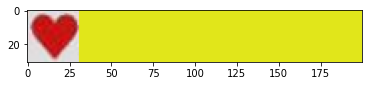

In [ ]:
max_length = 7
 
 
# See what the first validation image for recognition training looks like.
image, text = next(rec_img_train)
print('This image contains:', text)
plt.imshow(image)

In [ ]:
recognition_batch_size = 128
weights_dir = os.path.join('.', 'trained_weights')
#recognizer.model.load_weights(recognizer_weigths[0])
recognizer_basepath = os.path.join(weights_dir, f'rec_H_experiments_{datetime.datetime.now().isoformat()}')
recognition_train_generator, recognition_val_generator = [
    recognizer.get_batch_generator(
      image_generator=image_generator,
      batch_size=recognition_batch_size,
      lowercase=True
    ) for image_generator in [rec_img_train, rec_img_val]
]
'''
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, restore_best_weights=False),
    tf.keras.callbacks.ModelCheckpoint('recognizer_borndigital.h5', monitor='val_loss', save_best_only=True),
    tf.keras.callbacks.CSVLogger('recognizer_borndigital.csv')
    tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1),
 
'''
 
recognizer.training_model.fit_generator(
    generator=recognition_train_generator,
    epochs=1000,
    steps_per_epoch=math.ceil(len(train) / recognition_batch_size),
    callbacks=[
              tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, restore_best_weights=False),
      tf.keras.callbacks.CSVLogger(f'{recognizer_basepath}.csv', append=True),
      tf.keras.callbacks.ModelCheckpoint(filepath=f'{recognizer_basepath}.h5', monitor='val_loss', save_best_only=True, verbose=1) 
    ],
    validation_data=recognition_val_generator,
    validation_steps=math.ceil(len(validation) / recognition_batch_size),
    workers=0
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1000
6893/6893 [==============================] - ETA: 0s - loss: 2.0456222 / 220565 instances have illegal characters.

Epoch 00001: val_loss improved from inf to 0.24768, saving model to ./trained_weights/rec_H_experiments_2021-01-14T12:35:14.170615.h5
6893/6893 [==============================] - 14318s 2s/step - loss: 2.0456 - val_loss: 0.2477
Epoch 2/1000
6893/6893 [==============================] - ETA: 0s - loss: 0.1970
Epoch 00002: val_loss improved from 0.24768 to 0.17833, saving model to ./trained_weights/rec_H_experiments_2021-01-14T12:35:14.170615.h5
6893/6893 [==============================] - 12330s 2s/step - loss: 0.1970 - val_loss: 0.1783
Epoch 3/1000
6893/6893 [==============================] - ETA: 0s - loss: 0.1281
Epoch 00003: val_loss improved from 0.17833 to 0.15638, saving model to ./trained_weights/rec_H_experiments_2021-01-14T12:35:14.170615.h5
6893/6893 [========================